In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 19 16:46:20 2024

@author: sspringe137, AndreScaffidi
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# Directory setup for custom modules
import sys
sys.path.append('../../eagleeye')
import EagleEye_v7

# Reimport the modules
importlib.reload(EagleEye_v7)


# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'gray'
})

def generate_positions_with_separation(dim, num_anomalies, separation_factor=20):
    positions = []
    center_positions = []
    border_positions = []
    
    for i in range(num_anomalies):
        position = np.zeros(dim)
        
        if i < dim:  # Place the first `dim` anomalies near the center
            position[:dim] = (i - (dim / 2)) * separation_factor
            center_positions.append(position)
        else:  # Place remaining anomalies near the borders
            axis = (i % dim)  # Alternate through dimensions for placement
            direction = (-1 if (i // dim) % 2 == 0 else 1)  # Alternate directions
            position[axis] = direction * (50 + ((i // dim) * separation_factor))
            border_positions.append(position)
        
        positions.append(position)

    return np.array(positions)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Generate data with anomalies
num_points = 5000
anomaly_sizes = [50, 100, 200, 300, 500, 700, 900]
n_dim = 3


# Generate the points
reference_data = np.random.uniform(low=-100, high=100, size=(num_points, n_dim))

# Generate the points
data_with_anomaly = np.random.uniform(low=-100, high=100, size=(num_points-sum(anomaly_sizes), n_dim))

# Generate separated positions dynamically
positions = generate_positions_with_separation(n_dim, len(anomaly_sizes))

# Generate anomalies with the new positions
overdensities = []
local_i = 1
for size, center in zip(anomaly_sizes, positions):
    
    anomaly = np.random.normal(loc=center, scale=local_i, size=(size, n_dim))
    overdensities.append(anomaly)
    local_i = local_i + 1

# Combine the test set with the anomalies
data_with_anomaly = np.vstack([data_with_anomaly] + overdensities)


In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# EagleEye
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Can now split run and post-processing into two steps with critical_qauntiles=None
importlib.reload(EagleEye_v7)
res = EagleEye_v7.Soar(reference_data, data_with_anomaly, result_dict_in={}, K_M=100, critical_quantiles=None, num_cores=100, validation=None, partition_size=100,smoothing=3)

Eagle...Soar!

                               /T /I
                              / |/ | .-~/
                          T\ Y  I  |/  /  _
         /T               | \I  |  I  Y.-~/
        I l   /I       T\ |  |  l  |  T  /
     T\ |  \ Y l  /T   | \I  l   \ `  l Y
 __  | \l   \l  \I l __l  l   \   `  _. |
 \ ~-l  `\   `\  \  \ ~\  \   `. .-~   |
  \   ~-. "-.  `  \  ^._ ^. "-.  /  \   |
.--~-._  ~-  `  _  ~-_.-"-." ._ /._ ." ./
 &gt;--.  ~-.   ._  ~&gt;-"    "\   7   7   ]
^.___~"--._    ~-{  .-~ .  `\ Y . /    |
 &lt;__ ~"-.  ~       /_/   \   \I  Y   : |
   ^-.__           ~(_/   \   &gt;._:   | l______
       ^--.,___.-~"  /_/   !  `-.~"--l_ /     ~"-.
              (_/ .  ~(   /'     "~"--,Y   -=b-. _)
               (_/ .  \  :           / l      c"~o \
                \ /    `.    .     .^   \_.-~"~--.  )
                 (_/ .   `  /     /       !       )/
                  / / _.   '.   .':      /        '
                  ~(_/ .   /    _  `  .-&lt;_
                    /_/ 

In [3]:
# Just for debugging the post processing
# Reimport the modules
importlib.reload(EagleEye_v7)
res_new = EagleEye_v7.Soar(reference_data, data_with_anomaly, result_dict_in=res, K_M=100, critical_quantiles=[1-1E-5],  num_cores=100, validation=None, partition_size=100,smoothing=3)


Eagle...Soar!

                               /T /I
                              / |/ | .-~/
                          T\ Y  I  |/  /  _
         /T               | \I  |  I  Y.-~/
        I l   /I       T\ |  |  l  |  T  /
     T\ |  \ Y l  /T   | \I  l   \ `  l Y
 __  | \l   \l  \I l __l  l   \   `  _. |
 \ ~-l  `\   `\  \  \ ~\  \   `. .-~   |
  \   ~-. "-.  `  \  ^._ ^. "-.  /  \   |
.--~-._  ~-  `  _  ~-_.-"-." ._ /._ ." ./
 &gt;--.  ~-.   ._  ~&gt;-"    "\   7   7   ]
^.___~"--._    ~-{  .-~ .  `\ Y . /    |
 &lt;__ ~"-.  ~       /_/   \   \I  Y   : |
   ^-.__           ~(_/   \   &gt;._:   | l______
       ^--.,___.-~"  /_/   !  `-.~"--l_ /     ~"-.
              (_/ .  ~(   /'     "~"--,Y   -=b-. _)
               (_/ .  \  :           / l      c"~o \
                \ /    `.    .     .^   \_.-~"~--.  )
                 (_/ .   `  /     /       !       )/
                  / / _.   '.   .':      /        '
                  ~(_/ .   /    _  `  .-&lt;_
                    /_/ 

In [15]:
res_new['Upsilon_star_plus']

array([12.85])

In [18]:
# Check clustering
importlib.reload(EagleEye_v7)
clusters_plus,clusters_minus = EagleEye_v7.partitian_function(reference_data,data_with_anomaly,res_new,20, 20,100)

Computation of distances started
Computation of the distances up to 100 NNs started
0.16 seconds for computing distances
ID estimation finished: selecting ID of 2.966904146010862
kstar estimation started, Dthr = 23.92812698
0.03 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished
Clustering started
init succeded
Raw identification of the putative centers:  0.000 sec
Further checking on centers:  0.001 sec 
Pruning of the centers wrongly identified in part one:  0.000 sec
Preliminary assignation finished:  0.003 sec
Number of clusters before multimodality test= 8
Identification of the saddle points:  0.006 sec
Multimodality test finished:  0.000 sec
Final operations: 0.0003731250762939453 sec
Clustering finished, 7 clusters found
total time is, 0.011011838912963867
Computation of distances started
Computation of the distances up to 100 NNs started


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 101, n_samples_fit = 76, n_samples = 76

TypeError: 'dict_items' object is not subscriptable

/tmp/ipykernel_3441045/762628936.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  ax.scatter(


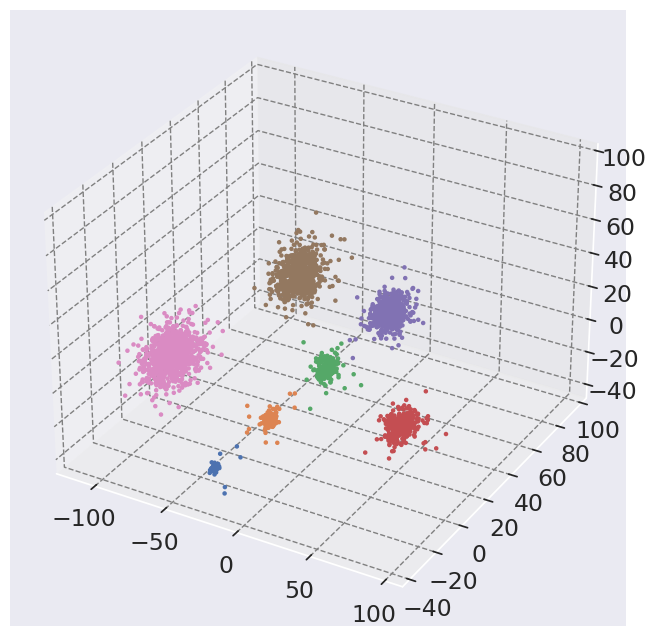

/tmp/ipykernel_3441045/762628936.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  ax.scatter(


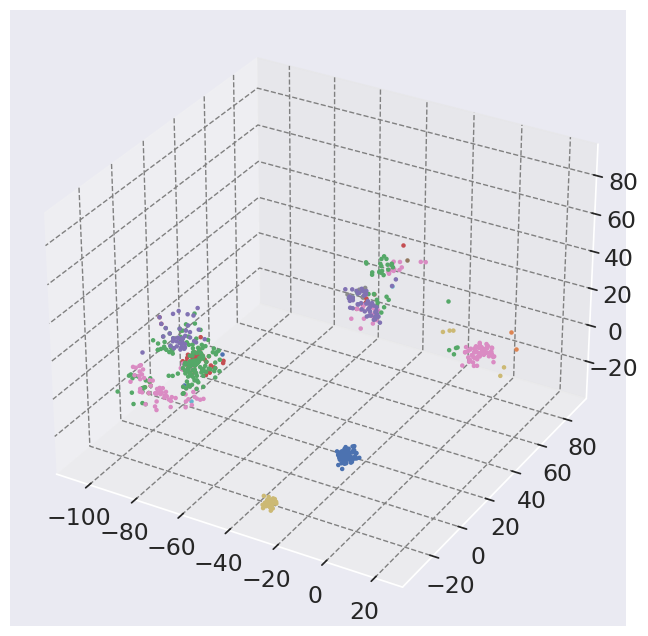

/tmp/ipykernel_3441045/762628936.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  ax.scatter(


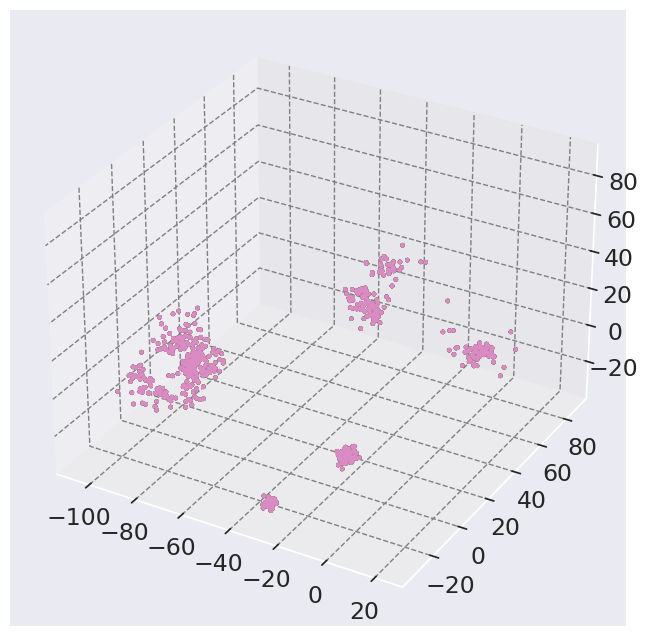

/tmp/ipykernel_3441045/762628936.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  ax.scatter(


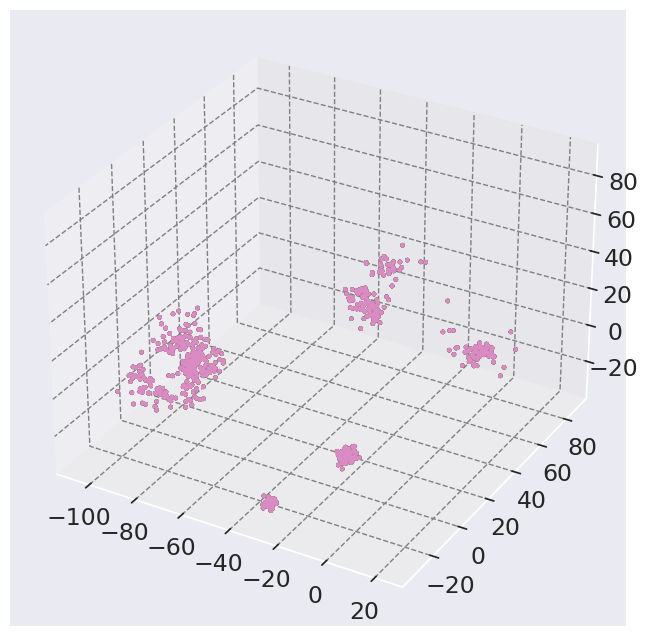

In [19]:
# Create the scatter plot and capture the scatter object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in clusters_plus:
    ax.scatter(
        data_with_anomaly[cluster, 0],
        data_with_anomaly[cluster, 1],
        data_with_anomaly[cluster, 2],
        cmap='magma',
        alpha=1,
        s=5,
        vmin=0
    )
plt.show()


# Create the scatter plot and capture the scatter object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
overdensities = res_new['overdensities']
for key in res_new['unique_elements_overdensities'].keys():
    ax.scatter(
        data_with_anomaly[res_new['unique_elements_overdensities'][key], 0],
        data_with_anomaly[res_new['unique_elements_overdensities'][key], 1],
        data_with_anomaly[res_new['unique_elements_overdensities'][key], 2],
        cmap='magma',
        alpha=1,
        s=5,
        vmin=0
    )
plt.show()


# Create the scatter plot and capture the scatter object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
overdensities = res_new['overdensities']
for cluster in clusters_plus:
    ax.scatter(
        data_with_anomaly[overdensities[0.99999], 0],
        data_with_anomaly[overdensities[0.99999], 1],
        data_with_anomaly[overdensities[0.99999], 2],
        cmap='magma',
        alpha=1,
        s=5,
        vmin=0
    )
plt.show()


# Create the scatter plot and capture the scatter object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
overdensities = res_new['overdensities']
for cluster in clusters_plus:
    ax.scatter(
        data_with_anomaly[overdensities[0.99999], 0],
        data_with_anomaly[overdensities[0.99999], 1],
        data_with_anomaly[overdensities[0.99999], 2],
        cmap='magma',
        alpha=1,
        s=5,
        vmin=0
    )
plt.show()



In [ ]:
importlib.reload(EagleEye_v7)
iv_ie = EagleEye_v7.IV_IE((clusters_plus,clusters_minus),res_new,10)

In [107]:
# Display the results
critical_quantile             = res['critical_quantile']  
stats                         = res['stats'] # Dict containing all upsilon+ and upsilon- values
stats_reverse                 = res['stats_reverse']
Upsilon_star_plus             = res['Upsilon_star_minus']
Upsilon_star_minus            = res['Upsilon_star_plus']
Upsilon_i_plus_null           = res['Upsilon_i_minus_null']
Upsilon_i_minus_null          = res['Upsilon_i_plus_null']
REGION_UNDER                  = res['REGION_UNDER']
REGION_OVER                   = res['REGION_OVER']           
unique_elements_overdensities = res['unique_elements_overdensities']
unique_elements_underdensities= res['unique_elements_underdensities']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_data[:, 0], reference_data[:, 1], reference_data[:, 2], s=5, alpha=0.05, c='silver')
ax.scatter(data_with_anomaly[-sum(anomaly_sizes):, 0], data_with_anomaly[-sum(anomaly_sizes):, 1], data_with_anomaly[-sum(anomaly_sizes):, 2], s=5, alpha=1, c='firebrick')

ax.set_xlim([-100,100])
ax.set_ylim([-100,100])
ax.set_zlim([-100,100])

# Set plot labels and title
ax.set_title("3D Scatter Plot background & 7 modes overdensities")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")


#%% 3D scatter of 7 modes after EE

i_EE = stats['Upsilon_i_plus'] > Upsilon_star_plus

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[i_EE, 0],
    data_with_anomaly[i_EE, 1],
    data_with_anomaly[i_EE, 2],
    c=stats['Upsilon_i_plus'][i_EE],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()

#%% 3D scatter of 7 modes after EE + iterative equalization


i_EE_postprocessing = unique_elements_overdensities

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[i_EE_postprocessing, 0],
    data_with_anomaly[i_EE_postprocessing, 1],
    data_with_anomaly[i_EE_postprocessing, 2],
    c=stats['Upsilon_i_plus'][i_EE_postprocessing],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE + postprocessing")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()


#%% 3D scatter of 7 modes after EE + iterative equalization and smoothing 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot and capture the scatter object
scatter = ax.scatter(
    data_with_anomaly[REGION_OVER, 0],
    data_with_anomaly[REGION_OVER, 1],
    data_with_anomaly[REGION_OVER, 2],
    c=stats['Upsilon_i_plus'][REGION_OVER],
    cmap='magma',
    alpha=1,
    s=5,
    vmin=0
)

# Set the limits for each axis
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_zlim([-100, 100])

# Set plot labels and title
ax.set_title("7 modes after EE + postprocessing+OVER REGIONS")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Add the colorbar using the scatter object
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Upsilon_i_plus Value')  # Optional: Add a label to the colorbar

plt.show()

KeyError: 'critical_quantile'